**Lab Task 1**: Plot all the given functions to observe the roots by visualization, fill the table by your visual guess of root. We have plotted one function for you.</br>
1) $f(x)=cos(x)-1.3x$</br>
2) $f(x)=xcos(x)-2x^2+3x-1$</br>
3) $f(x)=2xcos(2x)-(x+1)^2$





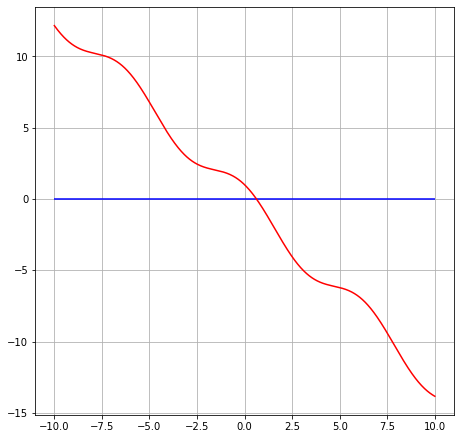

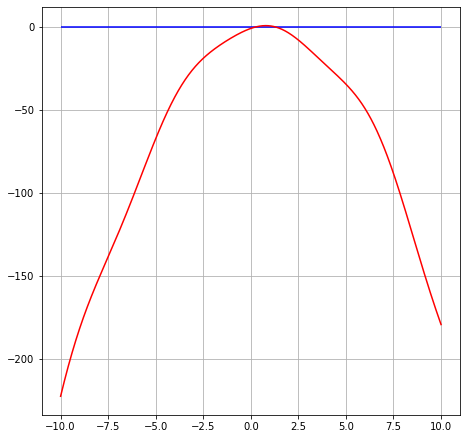

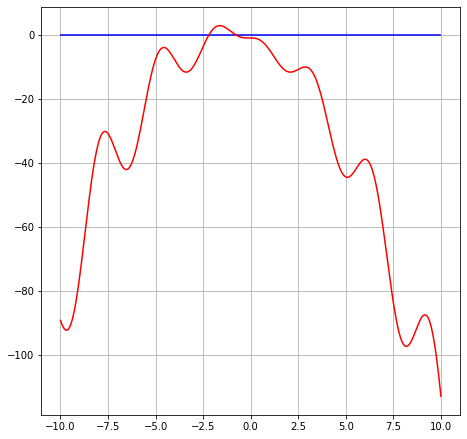

In [ ]:

import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 7.50]

def f1(x): return (np.cos(x)-1.3*x)
def f2(x): return (x*np.cos(x)-2*x**2+3*x-1)
def f3(x): return (2*x*np.cos(2*x)-(x+1)**2)

x = np.linspace(-10,10 , 1000)

plt.plot(x,f1(x), color='red')
plt.hlines(y=0,xmin=-10,xmax=10,color='blue')
plt.grid()
plt.show()

plt.plot(x,f2(x), color='red')
plt.hlines(y=0,xmin=-10,xmax=10,color='blue')
plt.grid()
plt.show()

plt.plot(x,f3(x), color='red')
plt.hlines(y=0,xmin=-10,xmax=10,color='blue')
plt.grid()
plt.show()

**Lab Task 2**: Complete the missing code of bisection method accordding to the explained algorithm and find root of given problems by bisection method according to the instructions given in table.</br> 
1) $f1(x)=cos(x)-1.3x$</br>
2) $f2(x)=xcos(x)-2x^2+3x-1$</br>
3) $f3(x)=2xcos(2x)-(x+1)^2$


In [44]:
import numpy as np
from tabulate import tabulate

## module Bisection
''' root = bisection(func, x1, x2, tol=0.0001, max_iter=100):.
    Finds a root of f(x) = 0 by bisection.
    The root must be bracketed in (x1,x2).
    
'''    

def bisection(func, x1, x2, tol=0.00001, max_iter=100):
    if func(x1) * func(x2) >= 0:
        return  "Error: Choose different interval, function should have different signs at the interval endpoints."
    data=[]
    iter = 0
    xr = x2
    error = tol + 1

    while iter < max_iter and error > tol:
        xrold = xr
        xr = ((x1+x2)/2)
        iter += 1
        error = abs((xr - xrold) ) 

        test = func(x1) * func(xr)

        if test < 0:
          x2 = xr
        elif test > 0:
          x1 = xr
        else:
          error = 0
        
        data.append([iter,x1,func(x1),x2,func(x2),xr,func(xr),error])
    print(tabulate(data,headers=['#','x1','f(x1)','x2','f(x2)','xr','f(xr)',"error"],tablefmt="github"))
    print('\nRoot of given function is x=%.9f in n=%d number of iterations with a tolerence=%.4f' %(xr,iter,tol))
    
    return
def f1(x): return (np.cos(x)-1.3*x)
def f2(x): return (x*np.cos(x)-2*x**2+3*x-1)
def f3(x): return (2*x*np.cos(2*x)-(x+1)**2)
bisection(f1,-10,10)
bisection(f2,0.5,2.5)
bisection(f3,-1.3,0)

|   # |       x1 |       f(x1) |        x2 |         f(x2) |       xr |        f(xr) |        error |
|-----|----------|-------------|-----------|---------------|----------|--------------|--------------|
|   1 | 0        | 1           | 10        | -13.8391      | 0        |  1           | 10           |
|   2 | 0        | 1           |  5        |  -6.21634     | 5        | -6.21634     |  5           |
|   3 | 0        | 1           |  2.5      |  -4.05114     | 2.5      | -4.05114     |  2.5         |
|   4 | 0        | 1           |  1.25     |  -1.30968     | 1.25     | -1.30968     |  1.25        |
|   5 | 0        | 1           |  0.625    |  -0.00153688  | 0.625    | -0.00153688  |  0.625       |
|   6 | 0.3125   | 0.545318    |  0.625    |  -0.00153688  | 0.3125   |  0.545318    |  0.3125      |
|   7 | 0.46875  | 0.282759    |  0.625    |  -0.00153688  | 0.46875  |  0.282759    |  0.15625     |
|   8 | 0.546875 | 0.143216    |  0.625    |  -0.00153688  | 0.546875 |  0.143216 

**Lab Task 3**: Find root of given problems by Newton Raphson method according to the instructions given in table.</br> 
1) $f1(x)=cos(x)-1.3x$</br>
2) $f2(x)=xcos(x)-2x^2+3x-1$</br>
3) $f3(x)=2xcos(2x)-(x+1)^2$


In [45]:
import numpy as np
from tabulate import tabulate

## module Newton_Raphson
''' newton_raphson(func, dfunc, x0, tol=1e-4, max_iter=1000)
    Finds a root of f(x) = 0 by newton_raphson.
'''    


def newton_raphson(func, dfunc, x0, tol=0.001, max_iter=1000):
    xr = x0
    data=[]
    iter = 0
    error = tol + 1
    for i in range(max_iter):
        iter+=1  
        fx = func(xr)
        dx = dfunc(xr)
        if abs(dx) < tol:
           raise Exception("Derivative is close to zero!")
        xrold=xr
        xr = xr - fx/dx
        error=abs(xr-xrold)
        data.append([iter,xr,func(xr),error])
        if error < tol:
           print(tabulate(data,headers=['Iteration','xr','f(xr)',"error"],tablefmt="github"))
           print('\nRoot of given function is x=%.9f in n=%d number of iterations with a tolerence=%.4f' %(xr,iter,tol))
           return

    raise Exception("Max iterations reached")

def f1(x): return (np.cos(x)-1.3*x)
def f2(x): return (x*np.cos(x)-2*x**2+3*x-1)
def f3(x): return (2*x*np.cos(2*x)-(x+1)**2)

def df1(x): return -np.sin(x) - 1.3
def df2(x): return -x*np.sin(x)+np.cos(x)-4*x+3
def df3(x): return -4*x*np.sin(2*x)+2*np.cos(2*x)-2*(x+1)

newton_raphson(f1,df1,4)
newton_raphson(f2,df2,1)
newton_raphson(f3,df3,-2)

|   Iteration |         xr |         f(xr) |        error |
|-------------|------------|---------------|--------------|
|           1 |  -6.77627  |   9.69003     | 10.7763      |
|           2 |   4.94572  |  -6.19822     | 11.722       |
|           3 | -14.0033   |  18.3378      | 18.949       |
|           4 |  45.3529   | -58.76        | 59.3563      |
|           5 |  19.5814   | -24.7119      | 25.7715      |
|           6 |   7.02619  |  -8.39761     | 12.5552      |
|           7 |   2.77748  |  -4.54516     |  4.24872     |
|           8 |   0.03302  |   0.956529    |  2.74446     |
|           9 |   0.750589 |  -0.244477    |  0.717568    |
|          10 |   0.627244 |  -0.00576897  |  0.123345    |
|          11 |   0.624187 |  -3.78686e-06 |  0.00305736  |
|          12 |   0.624185 |  -1.63847e-12 |  2.00954e-06 |

Root of given function is x=0.624184578 in n=12 number of iterations with a tolerence=0.0010
|   Iteration |      xr |        f(xr) |       error |
|----------

**Lab Task 4**: Find root of given problems by using fsolve command of sympy.optimize</br>
1) $f1(x)=cos(x)-1.3x$</br>
2) $f2(x)=xcos(x)-2x^2+3x-1$</br>
3) $f3(x)=2xcos(2x)-(x+1)^2$


In [15]:
from scipy.optimize import fsolve
def f1(x): return (np.cos(x)-1.3*x)
def f2(x): return (x*np.cos(x)-2*x**2+3*x-1)
def f3(x): return (2*x*np.cos(2*x)-(x+1)**2)

print(fsolve(f1,0))
print(fsolve(f2,0))
print(fsolve(f3,-2))

[0.62418458]
[0.29753023]
[-2.19130801]


**Lab Task 5**: Write program of Secant and False Position method by altering above codes.

In [26]:
#Secant Method
def SecantMethod(f, x0, x1, tol=1e-4, max_iter=1000):
    xr = x1
    xrold = x0
    data=[]
    iter = 0
    error = tol + 1
    for i in range(max_iter):
        iter+=1  
        temp = xr
        xr=xr-(f(xr)*(xr-xrold))/(f(xr)-f(xrold))
        xrold = temp
        error=abs(xr-xrold)
        data.append([iter,xr,f(xr),error])
        if error < tol:
           print(tabulate(data,headers=['Iteration','xr','f(xr)',"error"],tablefmt="github"))
           print('\nRoot of given function is x=%.9f in n=%d number of iterations with a tolerence=%.4f' %(xr,iter,tol))
           return

    raise Exception("Max iterations reached")

def RegulaFalsiMethod(f, x1, x2, tol=0.0001, max_iter=100):
    if f(x1) * f(x2) >= 0:
        return  "Error: Choose different interval, function should have different signs at the interval endpoints."
    data=[]
    iter = 0
    xr = x2
    error = tol + 1
    while iter < max_iter and error > tol:
        xrold = xr
        xr = (x1*f(x2)-x2*f(x1))/(f(x2)-f(x1))
        iter += 1
        error = abs((xr - xrold))
        test = f(x1) * f(xr)
        if test < 0:
          x2 = xr
        elif test > 0:
          x1 = xr
        else:
          error = 0
        
        data.append([iter,x1,f(x1),x2,f(x2),xr,f(xr),error])
    print(tabulate(data,headers=['#','x1','f(x1)','x2','f(x2)','xr','f(xr)',"error"],tablefmt="github"))
    print('\nRoot of given function is x=%.9f in n=%d number of iterations with a tolerence=%.4f' %(xr,iter,tol))
    
    return
def f1(x): return (np.cos(x)-1.3*x)
def f2(x): return (x*np.cos(x)-2*x**2+3*x-1)
def f3(x): return (2*x*np.cos(2*x)-(x+1)**2)

print("Secant Method\n")

SecantMethod(f1,0,1)
SecantMethod(f2,0,0.5)
SecantMethod(f3,-2.5,-2.3)

print("\n\n\nRegulaFalsiMethod\n")

RegulaFalsiMethod(f1,0,1)
RegulaFalsiMethod(f2,0,1)
RegulaFalsiMethod(f3,-2.5,-2)

Secant Method

|   Iteration |       xr |        f(xr) |       error |
|-------------|----------|--------------|-------------|
|           1 | 0.568279 |  0.104065    | 0.431721    |
|           2 | 0.620293 |  0.00732815  | 0.0520131   |
|           3 | 0.624233 | -9.07053e-05 | 0.00394018  |
|           4 | 0.624185 |  7.61396e-08 | 4.81738e-05 |

Root of given function is x=0.624184537 in n=4 number of iterations with a tolerence=0.0001
|   Iteration |       xr |        f(xr) |       error |
|-------------|----------|--------------|-------------|
|           1 | 0.347514 |  0.12775     | 0.152486    |
|           2 | 0.284885 | -0.0342612   | 0.0626288   |
|           3 | 0.298129 |  0.00160432  | 0.0132444   |
|           4 | 0.297537 |  1.82126e-05 | 0.000592442 |
|           5 | 0.29753  | -9.92905e-09 | 6.80276e-06 |

Root of given function is x=0.297530230 in n=5 number of iterations with a tolerence=0.0001
|   Iteration |       xr |        f(xr) |       error |
|-------------|